In [41]:
%load_ext autoreload
%autoreload 2

from operaDB2 import OperaDB2
from omronEyeLib2 import OmronEye
from ttdcGlassLib2 import *
from imageLib2 import OperaImage
from sensorLib2 import *
import math
import numpy as np
import pandas as pd
import time
import cv2
import matplotlib.pyplot as plt
from scipy import ndimage

#Connection to opera DB
opera = OperaDB2('opera_conn.xml', 'meidai-opera-rds')
#cur.execute("select version()")
#print(cur.fetchall())

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.5/importlib/_bootstrap.py:222: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


connect to opera2 server


In [22]:
#Get time from video
#desire_date = '2018-07-27'
#desire_date = '2018-08-22'
#desire_date = '2018-09-19'
desire_date = '2019-02-20'

#opera.get_TripListFromTime('2018-09-19', '00:00:00.0000', '23:59:59')
tripLists = opera.get_TripListFromTime(desire_date)
#print(tripLists)

dataLists = opera.get_DataListFromTrip( tripLists )
opera.viz_DataLists(dataLists)

SELECT * FROM data_logs WHERE log_date > '2019-02-20 00:00:00' AND log_date < '2019-02-20 23:59:59';
0 2019-02-20 14:15:23 : aioi
{'name': 'gpslog', 'data_id': 45345, 'file_path': '/mnt/s3-combined/aioi/gpslog/gpslog-20190220141523.log'}
gpslog 45345
{'name': 'picamera1', 'data_id': 45351, 'file_path': '/mnt/s3-combined/aioi/picamera1/picamera1-20190220141602.mp4', 'time': Timestamp('2019-02-20 14:16:02')}
picamera1 45351

1 2019-02-20 09:20:01 : meidai
{'name': 'gpslog', 'data_id': 45364, 'file_path': '/mnt/s3-combined/meidai/gpslog/gpslog-20190220092001.log'}
gpslog 45364
{'name': 'omron', 'data_id': 45371, 'file_path': '/mnt/s3-combined/meidai/omron/omron-20190220092009.csv', 'time': Timestamp('2019-02-20 09:20:09')}
omron 45371
{'name': 'picamera1', 'data_id': 45378, 'file_path': '/mnt/s3-combined/meidai/picamera1/picamera1-20190220092002.mp4', 'time': Timestamp('2019-02-20 09:20:02')}
picamera1 45378
{'name': 'picamera2', 'data_id': 45385, 'file_path': '/mnt/s3-combined/meidai/pic

In [29]:
#Choice data
tId = 4 

In [44]:
#Initialize
video = OperaImage( opera )
videoCap = video.get_VideoFromTripList(dataLists[tId])

In [78]:
#prepare setting image
report_num = 11
row = 4 #vizualize row

frame_count = video.get_SizeFrameCount( videoCap['front'] )
fps = video.get_FPS( videoCap['front'] )

step = int(frame_count/report_num)

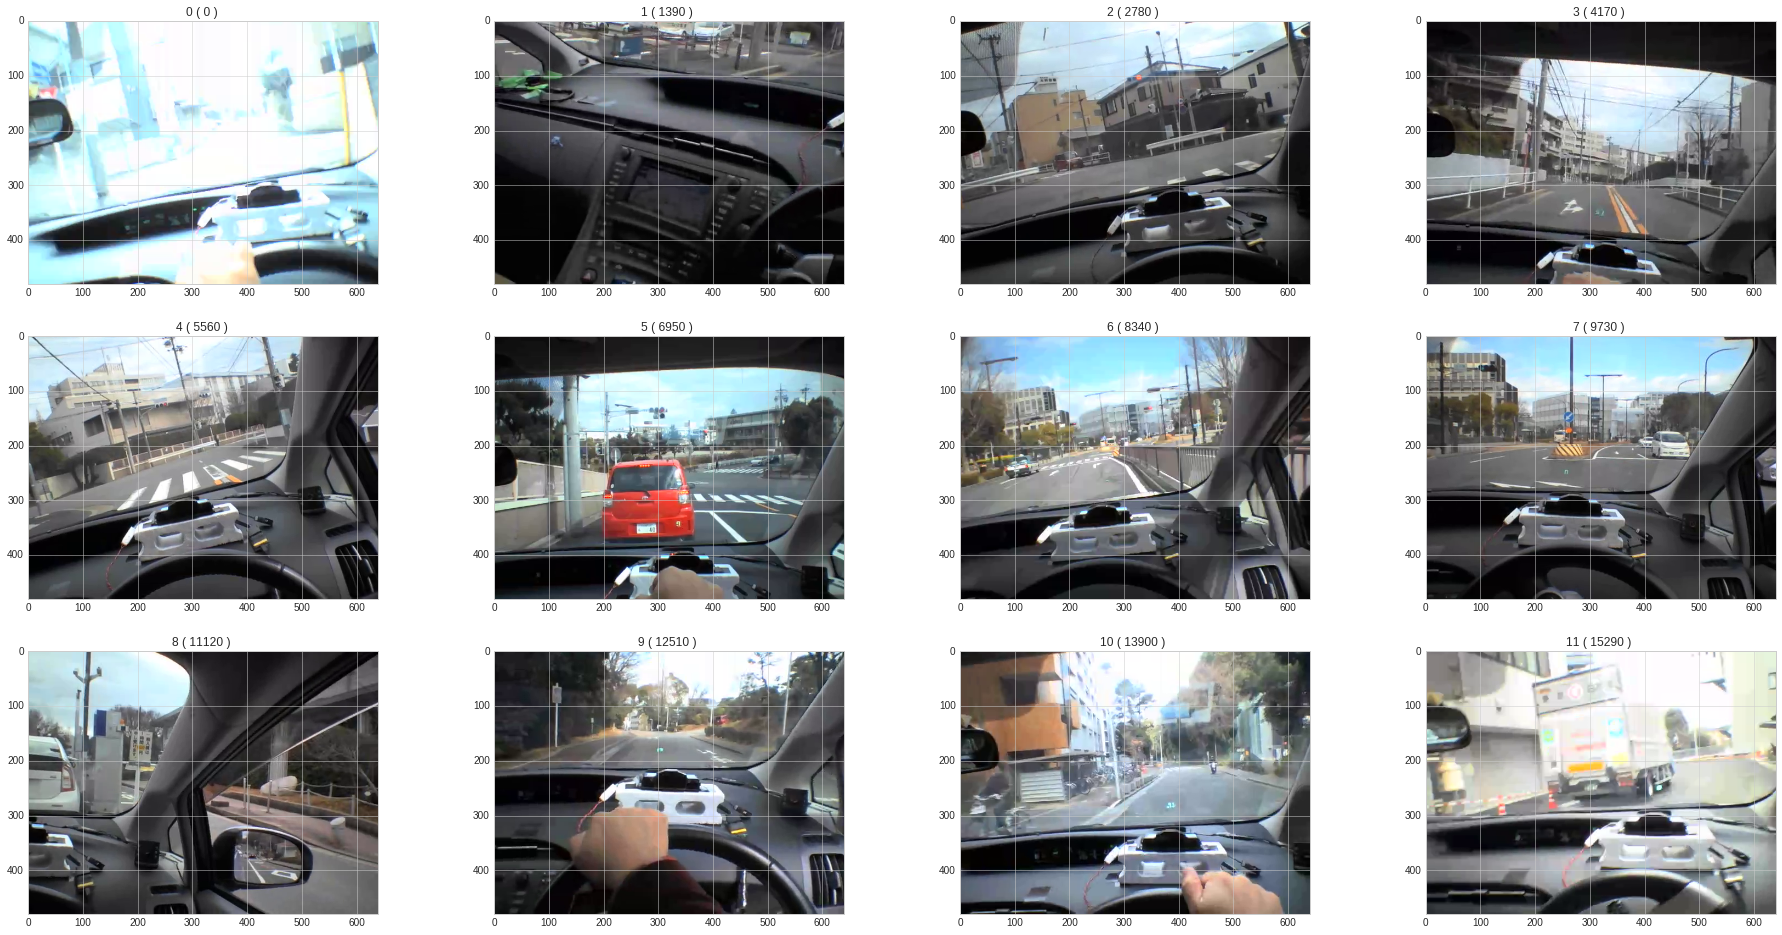

In [79]:
#Summary Image and Eye track
plt.style.use('seaborn-whitegrid')

col = math.ceil(report_num/row)

# figure は 1 つ
plt.figure(figsize=(32, 16)) # figureの縦横の大きさ

for c in range(col):
    for r in range(row):
        n = c*row + r
        if( n > report_num ):
            break
        if( frame_count <= step* n):
            break
        
        plt.subplot(col,row, n+1)
        video.set_FrameCount( videoCap['front'], step*n )
        ret, frame = video.read( videoCap['front'] )
        plt.imshow(ndimage.rotate(frame, 180, reshape=False))
        plt.title(str(n) + ' ( ' + str( step*n) + ' ) ' )

plt.show()

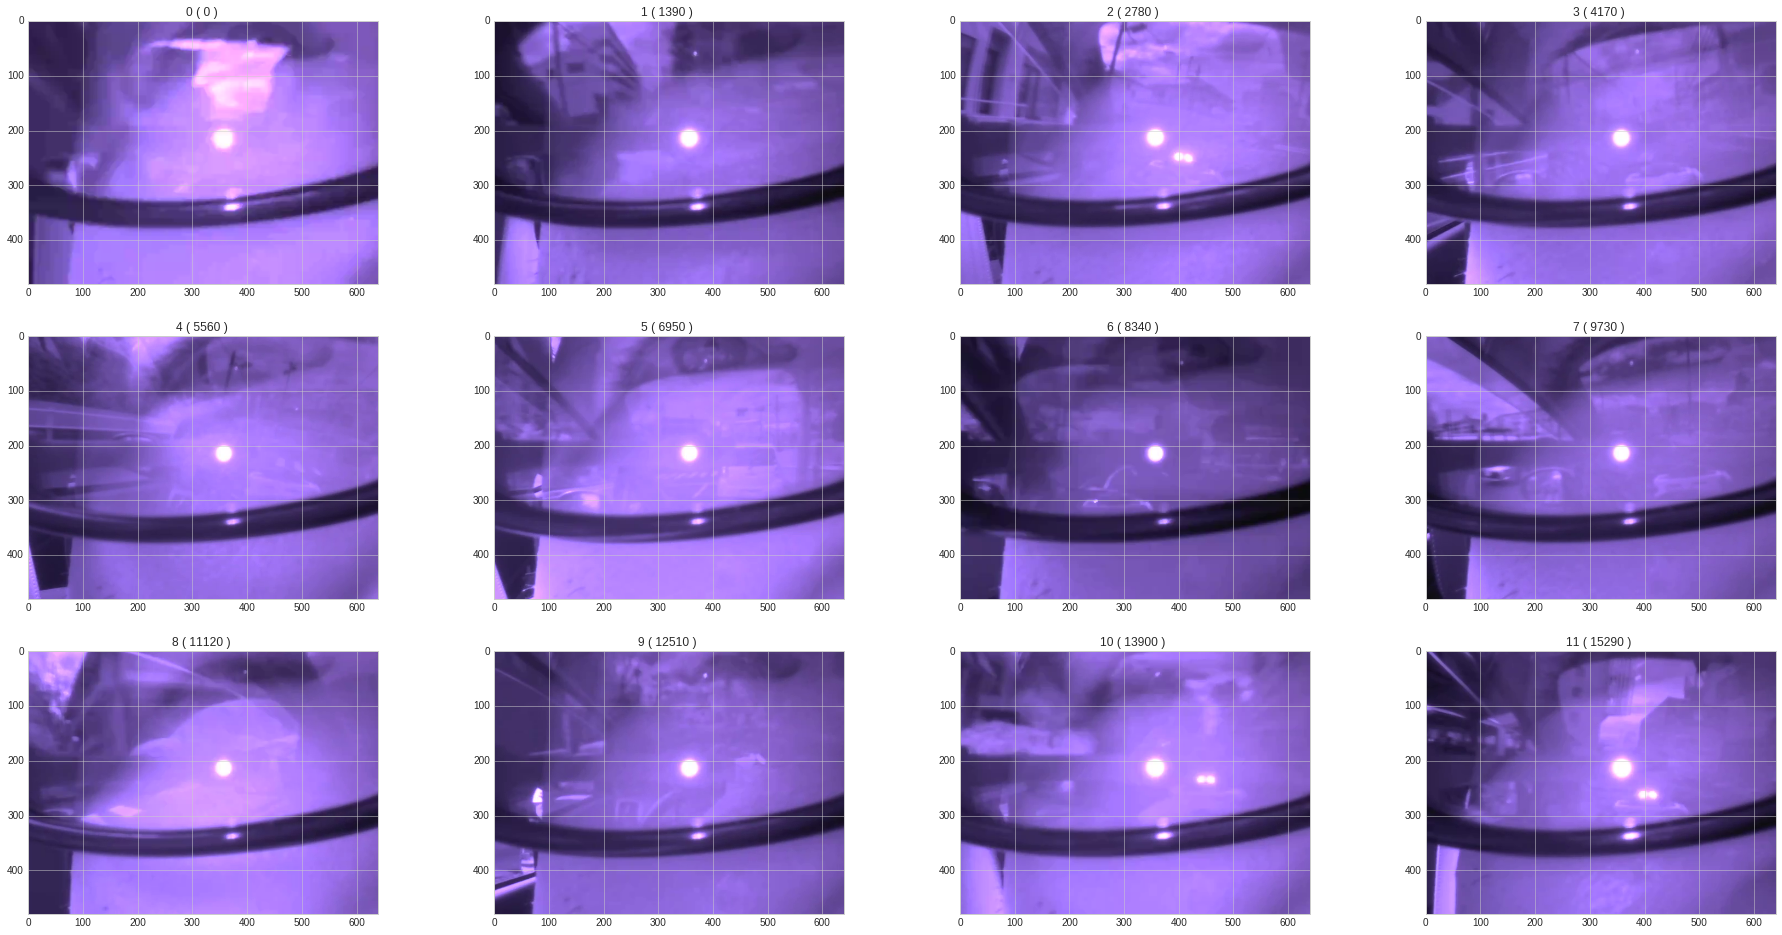

In [82]:
#Summary Image and Eye track
plt.style.use('seaborn-whitegrid')

row = 4
col = math.ceil(report_num/row)

# figure は 1 つ
plt.figure(figsize=(32, 16)) # figureの縦横の大きさ

for c in range(col):
    for r in range(row):
        n = c*row + r
        if( n > report_num ):
            break
        if( frame_count <= step* n):
            break
        
        plt.subplot(col,row, n+1)
        video.set_FrameCount( videoCap['eye'], step*n )
        ret, frame = video.read( videoCap['eye'] )
        plt.imshow(frame)
        plt.title(str(n) + ' ( ' + str( step*n) + ' ) ' )

plt.show()